# TP1 Metodos Computacionales

Integrantes: Bautista Lobo y Yoni Kullock

### Ejercicio 1:

Escribimos las funciones de $f_0 (t)$, $f_1 (t)$, $g(t)$ :

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def funcion_cero(t: float, p0: tuple, p1: tuple) -> tuple:
    p0 = np.array(p0)
    p1 = np.array(p1)
    return (1 - t) * p0 + t * p1

def funcion_uno(t: float, p1: tuple, p2: tuple) -> tuple:
    p1 = np.array(p1)
    p2 = np.array(p2)
    return (1 - t) * p1 + t * p2

def funcion_g(t: float, p0: tuple, p1: tuple, p2: tuple) -> tuple:
    f0 = funcion_cero(t, p0, p1)
    f1 = funcion_uno(t, p1, p2)
    return (1 - t) * f0 + t * f1

Graficamos $f_0 (t), f_1 (t),g(t)$ para valores de $p_0 = (1,2), p_1= (4,6),p_2=(8,3)$ para 100 valores $t$ entre $(0,1)$ utilizando la funcion Linespace de Numpy:

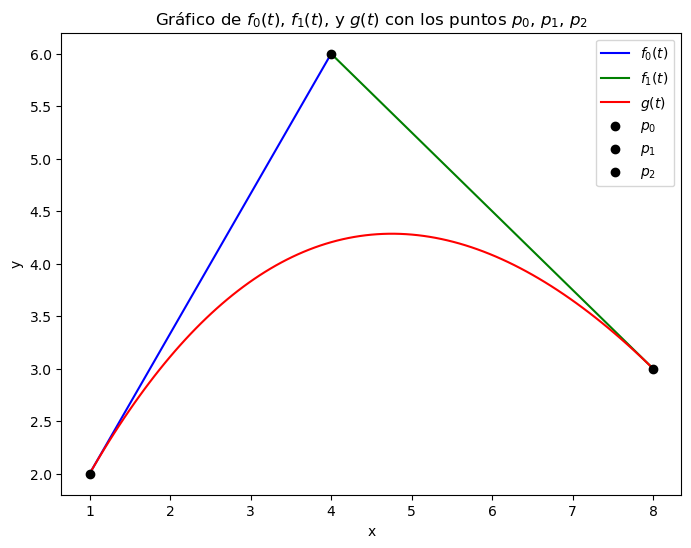

In [5]:
p0 = (1, 2)
p1 = (4, 6)
p2 = (8, 3)

t_values = np.linspace(0, 1, 100)

f0_values = [funcion_cero(t, p0, p1) for t in t_values]
f1_values = [funcion_uno(t, p1, p2) for t in t_values]
g_values = [funcion_g(t, p0, p1, p2) for t in t_values]

f0_values = np.array(f0_values)
f1_values = np.array(f1_values)
g_values = np.array(g_values)

plt.figure(figsize=(8, 6))
plt.plot(f0_values[:, 0], f0_values[:, 1], label='$f_0(t)$', color='blue')
plt.plot(f1_values[:, 0], f1_values[:, 1], label='$f_1(t)$', color='green')
plt.plot(g_values[:, 0], g_values[:, 1], label='$g(t)$', color='red')

plt.scatter(*p0, color='black', label='$p_0$', zorder=5)
plt.scatter(*p1, color='black', label='$p_1$', zorder=5)
plt.scatter(*p2, color='black', label='$p_2$', zorder=5)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de $f_0(t)$, $f_1(t)$, y $g(t)$ con los puntos $p_0$, $p_1$, $p_2$')
plt.show()

Interpretacion del grafico

Luego de ver el grafico podemos concluir que a medida que t varia entre los valores implementados por la funcion linespace de Numpy en el rango de $(0,1)$ nombrada anteriormente, traza las lineas $f_0 (t)$ y $f_1 (t)$ para luego trazar la curva $g(t)$ que es el resultado de interpolar las rectas trazadas para asi formar la curva cuadratica de Beizer.

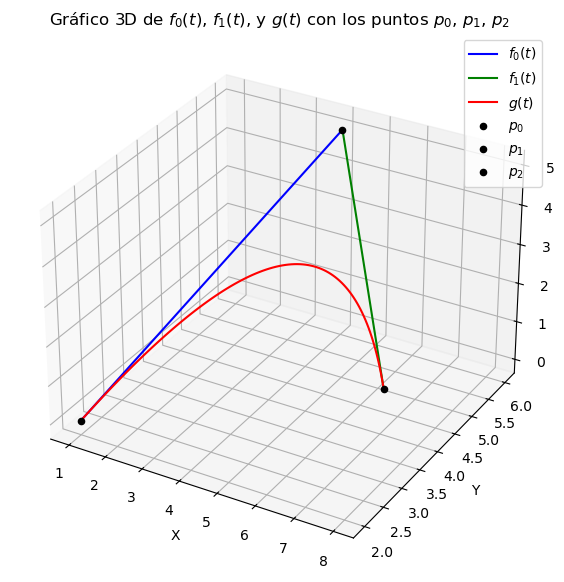

In [6]:
p0 = (1, 2, 0)
p1 = (4, 6, 5)
p2 = (8, 3, 2)

t_values = np.linspace(0, 1, 100)

f0_values = [funcion_cero(t, p0, p1) for t in t_values]
f1_values = [funcion_uno(t, p1, p2) for t in t_values]
g_values = [funcion_g(t, p0, p1, p2) for t in t_values]

f0_values = np.array(f0_values)
f1_values = np.array(f1_values)
g_values = np.array(g_values)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(f0_values[:, 0], f0_values[:, 1], f0_values[:, 2], label='$f_0(t)$', color='blue')
ax.plot(f1_values[:, 0], f1_values[:, 1], f1_values[:, 2], label='$f_1(t)$', color='green')
ax.plot(g_values[:, 0], g_values[:, 1], g_values[:, 2], label='$g(t)$', color='red')

ax.scatter(*p0, color='black', label='$p_0$', zorder=5)
ax.scatter(*p1, color='black', label='$p_1$', zorder=5)
ax.scatter(*p2, color='black', label='$p_2$', zorder=5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gráfico 3D de $f_0(t)$, $f_1(t)$, y $g(t)$ con los puntos $p_0$, $p_1$, $p_2$')
ax.legend()

plt.show()

Interpretacion del grafico 3D

Luego de ver el grafico 3D, podemos concluir que las curvas de Beizer funcionan de igual forma para todas las dimensiones o $R^n$.

### Ejercicio 2

In [7]:
def funcion_g2 (t:float,p1:tuple,p2:tuple,p3:tuple)->tuple:
  
  x = (1 - t) * funcion_cero(t,p1,p2)[0] + t * funcion_uno(t,p2,p3)[0]
  y = (1 - t) * funcion_cero(t,p1,p2)[1] + t * funcion_uno(t,p2,p3)[1]
  
  return (x,y)

def funcion_h (t:float,p0:tuple,p1:tuple,p2:tuple, p3:tuple)->tuple:
   
  x = (1 - t) * funcion_g(t,p0,p1,p2)[0] + t * funcion_g2(t,p1,p2,p3)[0]
  y = (1 - t) * funcion_g(t,p0,p1,p2)[1] + t * funcion_g2(t,p1,p2,p3)[1]
  
  return (x,y)

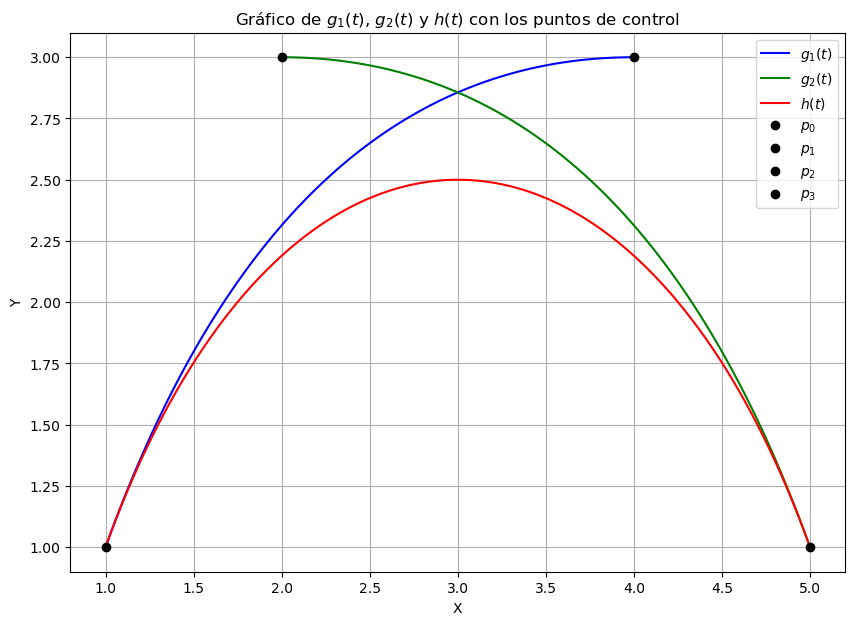

In [8]:
p0 = (1, 1)
p1 = (2, 3)
p2 = (4, 3)
p3 = (5, 1)

t_values = np.linspace(0, 1, 100)
g1_values = [funcion_g(t, p0, p1, p2) for t in t_values]
g2_values = [funcion_g2(t, p1, p2, p3) for t in t_values]
h_values = [funcion_h(t, p0, p1, p2, p3) for t in t_values]
g1_values = np.array(g1_values)
g2_values = np.array(g2_values)
h_values = np.array(h_values)
plt.figure(figsize=(10, 7))
plt.plot(g1_values[:, 0], g1_values[:, 1], label='$g_1(t)$', color='blue')
plt.plot(g2_values[:, 0], g2_values[:, 1], label='$g_2(t)$', color='green')
plt.plot(h_values[:, 0], h_values[:, 1], label='$h(t)$', color='red')
plt.scatter(*p0, color='black', label='$p_0$', zorder=5)
plt.scatter(*p1, color='black', label='$p_1$', zorder=5)
plt.scatter(*p2, color='black', label='$p_2$', zorder=5)
plt.scatter(*p3, color='black', label='$p_3$', zorder=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de $g_1(t)$, $g_2(t)$ y $h(t)$ con los puntos de control')
plt.legend()
plt.grid(True)
plt.show()

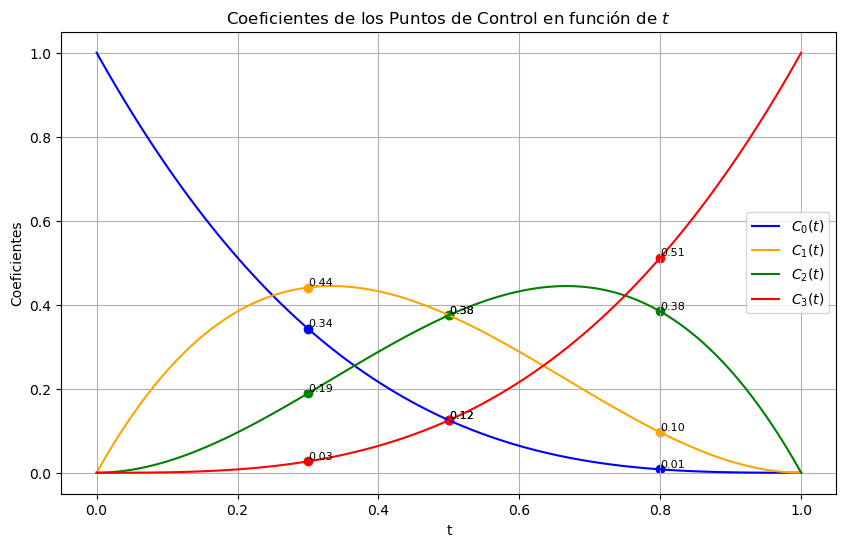

{0.3: 0.9999999999999998, 0.5: 1.0, 0.8: 1.0}

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de t
t_values = np.linspace(0, 1, 100)

# Coeficientes de los puntos de control
C0 = (1 - t_values)**3
C1 = 3 * (1 - t_values)**2 * t_values
C2 = 3 * (1 - t_values) * t_values**2
C3 = t_values**3

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
plt.plot(t_values, C0, label='$C_0(t)$', color='blue')
plt.plot(t_values, C1, label='$C_1(t)$', color='orange')
plt.plot(t_values, C2, label='$C_2(t)$', color='green')
plt.plot(t_values, C3, label='$C_3(t)$', color='red')

# Marcar puntos específicos
for t in [0.3, 0.5, 0.8]:
    plt.scatter(t, (1 - t)**3, color='blue', marker='o')
    plt.scatter(t, 3 * (1 - t)**2 * t, color='orange', marker='o')
    plt.scatter(t, 3 * (1 - t) * t**2, color='green', marker='o')
    plt.scatter(t, t**3, color='red', marker='o')
    
    plt.text(t, (1 - t)**3, f'{(1 - t)**3:.2f}', fontsize=8, verticalalignment='bottom')
    plt.text(t, 3 * (1 - t)**2 * t, f'{3 * (1 - t)**2 * t:.2f}', fontsize=8, verticalalignment='bottom')
    plt.text(t, 3 * (1 - t) * t**2, f'{3 * (1 - t) * t**2:.2f}', fontsize=8, verticalalignment='bottom')
    plt.text(t, t**3, f'{t**3:.2f}', fontsize=8, verticalalignment='bottom')

# Etiquetas y leyendas
plt.xlabel('t')
plt.ylabel('Coeficientes')
plt.title('Coeficientes de los Puntos de Control en función de $t$')
plt.legend()
plt.grid(True)
plt.show()

# Calcular la suma de los coeficientes para t = 0.3, t = 0.5, t = 0.8
def suma_coeficientes(t):
    return (1 - t)**3 + 3 * (1 - t)**2 * t + 3 * (1 - t) * t**2 + t**3

t_values_to_check = [0.3, 0.5, 0.8]
suma_resultados = {t: suma_coeficientes(t) for t in t_values_to_check}
suma_resultados

### Ejercicio 3

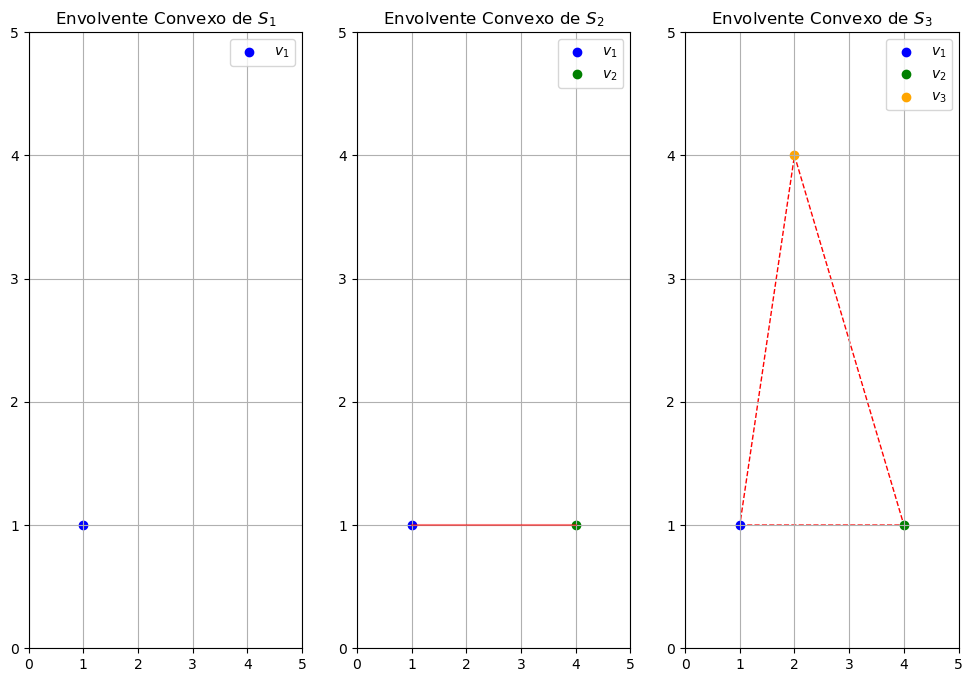

In [10]:
v1 = np.array([1, 1])
v2 = np.array([4, 1])
v3 = np.array([2, 4])

# Crear la figura
plt.figure(figsize=(12, 8))

# Visualizar el envolvente convexo para S1
plt.subplot(1, 3, 1)
plt.scatter(*v1, color='blue', label='$v_1$')
plt.title('Envolvente Convexo de $S_1$')
plt.legend()
plt.grid(True)
plt.xlim(0, 5)
plt.ylim(0, 5)

# Visualizar el envolvente convexo para S2
plt.subplot(1, 3, 2)
plt.plot([v1[0], v2[0]], [v1[1], v2[1]], 'r-', alpha=0.5)
plt.scatter(*v1, color='blue', label='$v_1$')
plt.scatter(*v2, color='green', label='$v_2$')
plt.title('Envolvente Convexo de $S_2$')
plt.legend()
plt.grid(True)
plt.xlim(0, 5)
plt.ylim(0, 5)

# Visualizar el envolvente convexo para S3
plt.subplot(1, 3, 3)
triangle = plt.Polygon([v1, v2, v3], closed=True, fill=None, edgecolor='r', linestyle='--')
plt.gca().add_patch(triangle)
plt.scatter(*v1, color='blue', label='$v_1$')
plt.scatter(*v2, color='green', label='$v_2$')
plt.scatter(*v3, color='orange', label='$v_3$')
plt.title('Envolvente Convexo de $S_3$')
plt.legend()
plt.grid(True)
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.show()

#### Interpretacion grafica

Envolvente Convexo:

El envolvente convexo de un conjunto de puntos S = \{ v_1, v_2, \ldots, v_k \} en \mathbb{R}^n es el conjunto de todas las combinaciones convexas de estos puntos. Una combinación convexa tiene la forma:

c_1 v_1 + c_2 v_2 + \cdots + c_k v_k

donde c_i \geq 0 para todo i y c_1 + c_2 + \cdots + c_k = 1 .

Vamos a encontrar el envolvente convexo para los siguientes conjuntos en \mathbb{R}^2 y visualizarlos.

Conjunto $S_1 = \{ v_1 \}$

Para un conjunto con un solo punto v_1 , el envolvente convexo es simplemente el punto v_1 mismo. En otras palabras:

$\text{conv}(S_1) = \{ v_1 \}$

$Conjunto S_2 = \{ v_1, v_2 \}$

Para dos puntos v_1 y v_2 , el envolvente convexo es la línea segmentaria entre estos dos puntos. Esto se define por todas las combinaciones convexas:

$c_1 v_1 + c_2 v_2$

donde c_1 \geq 0 , c_2 \geq 0 , y c_1 + c_2 = 1 . En \mathbb{R}^2 , esto forma una línea recta segmentaria entre v_1 y v_2 .

Conjunto S_3 = \{ v_1, v_2, v_3 \}

Para tres puntos $v_1, v_2, y v_3$ , el envolvente convexo es el polígono (generalmente un triángulo) formado por estos tres puntos. Las combinaciones convexas se definen como:

$c_1 v_1 + c_2 v_2 + c_3 v_3$

donde $c_1 \geq 0 , c_2 \geq 0 , c_3 \geq 0 , y c_1 + c_2 + c_3 = 1 $. En \mathbb{R}^2 , esto forma un triángulo.

interpretacion probando que Beizer es una combinacion conexa**

Sí, las curvas de Bézier son una combinación convexa de sus puntos de control y, por lo tanto, están contenidas dentro del polígono formado por estos puntos de control. Vamos a explicar esto más detalladamente.

Curvas de Bézier y Combinación Convexa

Una curva de Bézier cúbica en \mathbb{R}^2 se define como:

$B(t) = (1 - t)^3 \cdot p_0 + 3 \cdot (1 - t)^2 \cdot t \cdot p_1 + 3 \cdot (1 - t) \cdot t^2 \cdot p_2 + t^3 \cdot p_3$

donde:

•   $p_0, p_1, p_2, p_3$ son los puntos de control.

•   t varía entre 0 y 1.

Combinación Convexa

Para que una curva de Bézier esté contenida dentro del polígono formado por los puntos de control, cada punto de la curva debe ser una combinación convexa de estos puntos.

Para una curva de Bézier cúbica, la combinación convexa tiene la forma general:

$B(t) = c_0 \cdot p_0 + c_1 \cdot p_1 + c_2 \cdot p_2 + c_3 \cdot p_3$

donde:

•   $c_0 = (1 - t)\^3$

•   $c_1 = 3 \\cdot (1 - t)\^2 \\cdot t$

•   $c_2 = 3 \\cdot (1 - t) \\cdot t\^2$

•   $c_3 = t\^3$

y se cumple que:

$c_0 + c_1 + c_2 + c_3 = 1$

y cada $c_i \geq 0$ para $0 \leq t \leq 1$. Esto asegura que cada punto en la curva de Bézier está dentro del polígono definido por los puntos de control $p_0, p_1, p_2, p_3$.

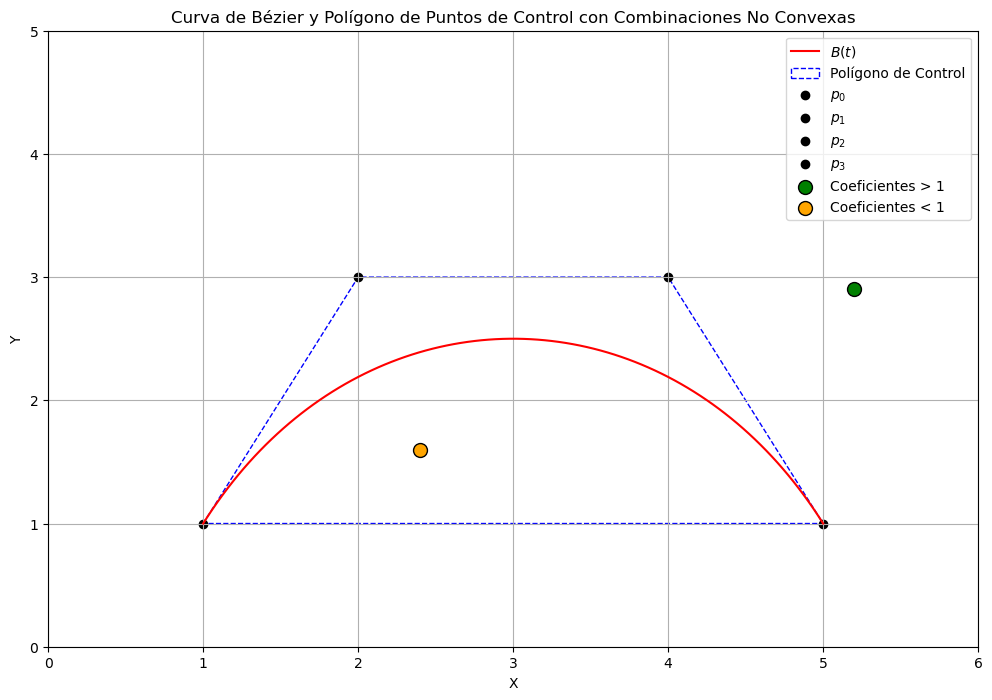

In [11]:
p0 = np.array([1, 1])
p1 = np.array([2, 3])
p2 = np.array([4, 3])
p3 = np.array([5, 1])

# Función de Bézier cúbica
def bezier_cubic(t, p0, p1, p2, p3):
    return (1 - t)**3 * p0 + 3 * (1 - t)**2 * t * p1 + 3 * (1 - t) * t**2 * p2 + t**3 * p3

# Valores de t
t_values = np.linspace(0, 1, 100)

# Calcular los puntos en la curva de Bézier
bezier_values = np.array([bezier_cubic(t, p0, p1, p2, p3) for t in t_values])

# Coeficientes que no suman 1
def non_convex_combination(coeffs, points):
    return sum(c * p for c, p in zip(coeffs, points))

# Coeficientes fuera del rango convex
coeffs1 = [0.3, 0.2, 0.5, 0.5]  # Suma es mayor que 1
coeffs2 = [0.2, 0.2, 0.2, 0.2]  # Suma es menor que 1

non_convex1 = non_convex_combination(coeffs1, [p0, p1, p2, p3])
non_convex2 = non_convex_combination(coeffs2, [p0, p1, p2, p3])

# Graficar
plt.figure(figsize=(12, 8))

# Graficar la curva de Bézier
plt.plot(bezier_values[:, 0], bezier_values[:, 1], label='$B(t)$', color='red')

# Graficar el polígono de los puntos de control
polygon = plt.Polygon([p0, p1, p2, p3], closed=True, fill=None, edgecolor='blue', linestyle='--', label='Polígono de Control')
plt.gca().add_patch(polygon)

# Marcar los puntos de control
plt.scatter(*p0, color='black', label='$p_0$')
plt.scatter(*p1, color='black', label='$p_1$')
plt.scatter(*p2, color='black', label='$p_2$')
plt.scatter(*p3, color='black', label='$p_3$')

# Marcar los puntos con coeficientes no convexos
plt.scatter(*non_convex1, color='green', label='Coeficientes > 1', s=100, edgecolor='black')
plt.scatter(*non_convex2, color='orange', label='Coeficientes < 1', s=100, edgecolor='black')

# Etiquetas y leyendas
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curva de Bézier y Polígono de Puntos de Control con Combinaciones No Convexas')
plt.legend()
plt.grid(True)
plt.xlim(0, 6)
plt.ylim(0, 5)
plt.show()

#### Interpretacion grafica 

Para que un punto sea una combinación convexa de los puntos de control, los coeficientes deben sumar exactamente 1 y ser no negativos. Si estos requisitos no se cumplen, el punto no estará dentro del polígono formado por los puntos de control, lo que demuestra que las curvas de Bézier, siendo una combinación convexa, siempre se mantienen dentro del polígono formado por sus puntos de control.

### Ejercicio 4

### Ejercicio 5

### Ejercicio 6

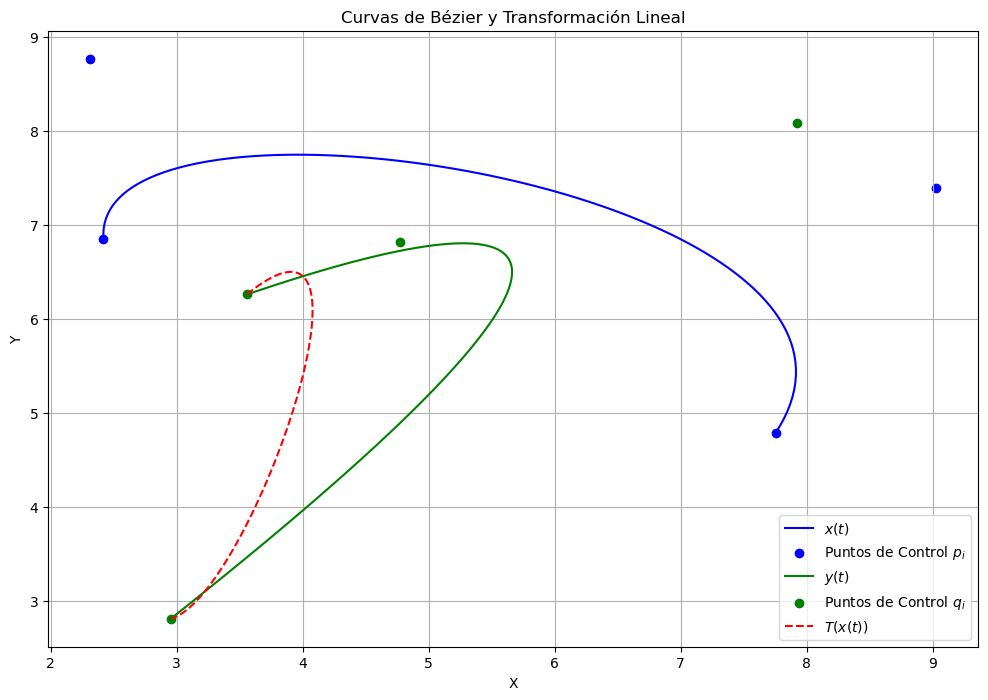

In [14]:
def generar_puntos_aleatorios():
    return [(np.random.rand() * 10, np.random.rand() * 10) for _ in range(4)]

def funcion_g2(t, p1, p2, p3):
    x = (1 - t) * funcion_cero(t, p1, p2)[0] + t * funcion_uno(t, p2, p3)[0]
    y = (1 - t) * funcion_cero(t, p1, p2)[1] + t * funcion_uno(t, p2, p3)[1]
    return (x, y)

def funcion_h(t, p0, p1, p2, p3):
    x = (1 - t) * funcion_g(t, p0, p1, p2)[0] + t * funcion_g2(t, p1, p2, p3)[0]
    y = (1 - t) * funcion_g(t, p0, p1, p2)[1] + t * funcion_g2(t, p1, p2, p3)[1]
    return (x, y)

def funcion_cero(t, p0, p1):
    x = (1 - t) * p0[0] + t * p1[0]
    y = (1 - t) * p0[1] + t * p1[1]
    return (x, y)

def funcion_uno(t, p1, p2):
    x = (1 - t) * p1[0] + t * p2[0]
    y = (1 - t) * p1[1] + t * p2[1]
    return (x, y)

def funcion_g(t, p0, p1, p2):
    x = (1 - t) * funcion_cero(t, p0, p1)[0] + t * funcion_uno(t, p1, p2)[0]
    y = (1 - t) * funcion_cero(t, p0, p1)[1] + t * funcion_uno(t, p1, p2)[1]
    return (x, y)

def transformacion_lineal(p0, p3, q0, q3):
    A = np.array([
        [p0[0], p0[1], 1, 0],
        [p3[0], p3[1], 1, 0],
        [0, 0, 1, p0[0]],
        [0, 0, 1, p3[0]]
    ])
    B = np.array([
        [q0[0], q0[1]],
        [q3[0], q3[1]],
        [0, 0],
        [0, 0]
    ])
    x = np.linalg.lstsq(A, B[:, 0], rcond=None)[0]
    y = np.linalg.lstsq(A, B[:, 1], rcond=None)[0]
    return lambda p: (x[0] * p[0] + x[1] * p[1] + x[2], y[0] * p[0] + y[1] * p[1] + y[2])

# Generar puntos de control aleatorios
p = generar_puntos_aleatorios()
q = generar_puntos_aleatorios()

p0, p1, p2, p3 = p
q0, q1, q2, q3 = q

# Calcular las curvas
t_values = np.linspace(0, 1, 100)
x_values = [funcion_h(t, p0, p1, p2, p3) for t in t_values]
y_values = [funcion_h(t, q0, q1, q2, q3) for t in t_values]

# Definir la transformación lineal
T = transformacion_lineal(p0, p3, q0, q3)

# Aplicar la transformación
x_transformed = [T(p) for p in x_values]

# Convertir a arrays para graficar
x_values = np.array(x_values)
y_values = np.array(y_values)
x_transformed = np.array(x_transformed)

# Graficar las curvas
plt.figure(figsize=(12, 8))

# Graficar curva x(t) con puntos de control
plt.plot(x_values[:, 0], x_values[:, 1], label='$x(t)$', color='blue')
plt.scatter(*zip(*[p0, p1, p2, p3]), color='blue', label='Puntos de Control $p_i$')

# Graficar curva y(t) con puntos de control
plt.plot(y_values[:, 0], y_values[:, 1], label='$y(t)$', color='green')
plt.scatter(*zip(*[q0, q1, q2, q3]), color='green', label='Puntos de Control $q_i$')

# Graficar la curva transformada T(x(t))
plt.plot(x_transformed[:, 0], x_transformed[:, 1], label='$T(x(t))$', color='red', linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Curvas de Bézier y Transformación Lineal')
plt.legend()
plt.grid(True)
plt.show()